In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [29]:
# 1. dataset <- titanic.csv
dataset = pd.read_csv('titanic.csv')
print(dataset)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [15]:
# 2. test_dataset <- titanic_test.csv
test_dataset = pd.read_csv('titanic_test.csv')
print(test_dataset)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

In [21]:
# 3. train_data <- ambil dataset kolom fitur (Sex, Age, Pclass, Fare).
# Lakukan pengisian missing value pada fitur Age dengan nilai mean dari
# masing-masing class
train_data = dataset.loc[:,['Sex', 'Age', 'Pclass', 'Fare']]
train_data['Age'] = train_data.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))
train_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True)
assert train_data.isnull().sum().sum() == 0
print(train_data)

        Sex       Age  Pclass     Fare
0      male  22.00000       3   7.2500
1    female  38.00000       1  71.2833
2    female  26.00000       3   7.9250
3    female  35.00000       1  53.1000
4      male  35.00000       3   8.0500
..      ...       ...     ...      ...
886    male  27.00000       2  13.0000
887  female  19.00000       1  30.0000
888  female  25.14062       3  23.4500
889    male  26.00000       1  30.0000
890    male  32.00000       3   7.7500

[891 rows x 4 columns]


In [22]:
# 4. test_data <- ambil test_dataset kolom fitur (Sex, Age, Pclass, Fare).
test_data = test_dataset.loc[:,['Sex', 'Age', 'Pclass', 'Fare']]
test_data['Age'] = test_data.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)
assert test_data.isnull().sum().sum() == 0
print(test_data)

        Sex        Age  Pclass      Fare
0      male  34.500000       3    7.8292
1    female  47.000000       3    7.0000
2      male  62.000000       2    9.6875
3      male  27.000000       3    8.6625
4    female  22.000000       3   12.2875
..      ...        ...     ...       ...
413    male  24.027945       3    8.0500
414  female  39.000000       1  108.9000
415    male  38.500000       3    7.2500
416    male  24.027945       3    8.0500
417    male  24.027945       3   22.3583

[418 rows x 4 columns]


In [24]:
# 5. train_label <-- ambil dataset kolom kelas (Survived)
train_label = dataset['Survived']
print(train_label)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [30]:
# 6. test_label  titanic_testlabel.csv
test_label = pd.read_csv('titanic_testlabel.csv')['Survived']
print(test_label)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [28]:
# 7. Lakukan klasifikasi test_data terhadap train_data dengan Decision
# Tree, dan berapakah error rationya?
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = label_encoder.transform(test_data['Sex'])

clf = DecisionTreeClassifier()
clf.fit(train_data, train_label)

test_predictions = clf.predict(test_data)
error_rate = 1 - accuracy_score(test_label, test_predictions)
print(f'Error Rate: {error_rate}')

Error Rate: 0.23444976076555024


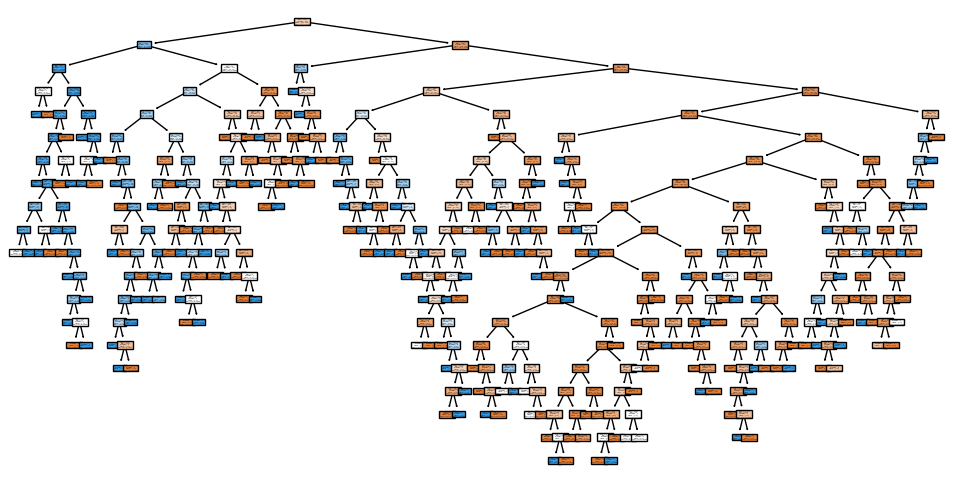

In [27]:
# 8. Tampilkan hirarki dari Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(clf, filled=True, feature_names=train_data.columns, class_names=['Not Survived', 'Survived'])
plt.show()